# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import glob
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')


In [2]:
#accessing csv file into a dataframe
Twit_archv = pd.read_csv('twitter-archive-enhanced.csv')
Twit_archv.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,12,10,None,None,None,None,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
2284,667192066997374976,NaN,NaN,2015-11-19 04:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*takes several long deep breaths* omg omg oMG ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667192066...,12,10,None,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
523,809448704142938112,NaN,NaN,2016-12-15 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I call this one ""A Blep by the Sea"" 12/10 http...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809448704...,12,10,None,None,None,None,None
863,762471784394268675,NaN,NaN,2016-08-08 02:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762471784...,12,10,Glenn,None,None,None,None
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,None,None,None,None


In [3]:
#Access Dataframe programatically 1
Twit_archv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
#Access Dataframe programatically 2
Twit_archv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
folder = 'image_predictions1'
if not os.path.exists(folder):
    os.makedirs(folder)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)   
response.status_code

200

In [6]:
with open(os.path.join(folder, url.split('/')[-1]),mode='wb' ) as file:
    file.write(response.content)

In [7]:
image_pred = pd.read_csv('image_predictions1/image-predictions.tsv', sep='\t')

In [8]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
image_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
1500,783839966405230592,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1,quilt,0.333739,False,Siamese_cat,0.136245,False,three-toed_sloth,0.117464,False
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True
1491,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
774,689623661272240129,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,toy_poodle,0.279604,True,mashed_potato,0.208564,False,Labrador_retriever,0.077481,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#### These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = Twit_archv.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [12]:
data = []
with open('tweet-json.txt') as file:
    for line in file:
        js_read = json.loads(line)
        output = {'tweet_id':js_read['id'],'retweets':js_read['retweet_count'],'Likes':js_read['favorite_count']}
        data.append(output)
        
tweet_data = pd.DataFrame(data)        
tweet_data = tweet_data.drop(columns=['retweets'])

In [13]:
tweet_data.head()

,Likes,tweet_id
0,39467,892420643555336193
1,33819,892177421306343426
2,25461,891815181378084864
3,42908,891689557279858688
4,41048,891327558926688256


In [14]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
Likes       2354 non-null int64
tweet_id    2354 non-null int64
dtypes: int64(2)
memory usage: 36.9 KB


In [15]:
tweet_data.describe()

,Likes,tweet_id
count,2354.000000,2.354000e+03
mean,8080.968564,7.426978e+17
std,11814.771334,6.852812e+16
min,0.000000,6.660209e+17
25%,1415.000000,6.783975e+17
50%,3603.500000,7.194596e+17
75%,10122.250000,7.993058e+17
max,132810.000000,8.924206e+17


In [16]:
tweet_data.sample(20)

,Likes,tweet_id
1880,2433,674999807681908736
980,2892,749403093750648834
1959,1558,673359818736984064
2323,129,666418789513326592
992,2411,748568946752774144
1374,3752,701805642395348998
1801,2354,676948236477857792
1310,2502,707014260413456384
122,55098,868880397819494401
1237,3211,712092745624633345


data = []
with open('tweet-json.txt','r') as file:
    lines = file.readlines()

for line in lines:
    data.append(json.loads(line))
    
json_data = pd.DataFrame(data)    

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues


1. `Twit archive Data` - Missing data in expanded urls, in-reply and retweet status columns.

2. `Twit archive Data` - expanded urls column contains alien urls that are not twitter.

3. `Twit archive Data` - Timestamp captured as object (string).

4. `Twit archive Data` - rating denominator captured a minimum of zero and a maximum of 170.

5. `Twit archive Data` - dog stage is captured in different columns.

6. `image_pred` - breed of dogs in p1, p2 and p3 are in different cases.

7. `Twit archive Data`  -  None is captured as an impute as dog name.

8. `Tweet_data`    -   very high count for maximum of likes.









### Tidiness issues

1. `image_pred`        - image_pred and tweet data are different tables


2.  `Twit_Archv`     -  The dog stage are presented in seperate columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
Twit_archv_clean = Twit_archv.copy()
image_pred_clean = image_pred.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1:

#### Define: Remove missing rows from expanded urls column and drop in-reply and retweet status columns.

In [18]:
Twit_archv_clean = Twit_archv_clean.dropna(subset=['expanded_urls'])

In [19]:
Twit_archv_clean = Twit_archv_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

In [20]:
#Filter with "RT" in text to remove retweets
Twit_archv_clean_text = Twit_archv_clean[Twit_archv_clean['text'].str.contains('RT')]
Twit_text = Twit_archv_clean_text.index

In [21]:
Twit_archv_clean = Twit_archv_clean.drop(index=Twit_text)

#### Test

In [22]:
Twit_archv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2106 non-null int64
timestamp             2106 non-null object
source                2106 non-null object
text                  2106 non-null object
expanded_urls         2106 non-null object
rating_numerator      2106 non-null int64
rating_denominator    2106 non-null int64
name                  2106 non-null object
doggo                 2106 non-null object
floofer               2106 non-null object
pupper                2106 non-null object
puppo                 2106 non-null object
dtypes: int64(3), object(9)
memory usage: 213.9+ KB


In [23]:
#Check for "RT" in text column
Twit_archv_clean_text = Twit_archv_clean[Twit_archv_clean['text'].str.contains('RT')]
Twit_archv_clean_text

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define: Filter out twitter urls from the expanded urls feature


#### Code

In [24]:
#use contains funtion to filter urls in the expanded_urls column that are from twitter.
Twit_archv_clean = Twit_archv_clean[Twit_archv_clean['expanded_urls'].str.contains('twitter')]

#### Test

In [25]:
Twit_archv_clean['expanded_urls'].sample(20)

1962    https://twitter.com/dog_rates/status/673355879...
624     https://twitter.com/dog_rates/status/795464331...
1573    https://twitter.com/dog_rates/status/687494652...
1423    https://twitter.com/dog_rates/status/697995514...
1042    https://twitter.com/dog_rates/status/743895849...
834     https://twitter.com/dog_rates/status/768473857...
837     https://twitter.com/dog_rates/status/767754930...
1415    https://twitter.com/dog_rates/status/698703483...
1438    https://twitter.com/dog_rates/status/696900204...
312     https://www.gofundme.com/lolas-life-saving-sur...
2200    https://twitter.com/dog_rates/status/668655139...
1174    https://twitter.com/dog_rates/status/720059472...
115     https://twitter.com/dog_rates/status/870374049...
1826    https://twitter.com/dog_rates/status/676440007...
495     https://twitter.com/dog_rates/status/813172488...
1360    https://twitter.com/dog_rates/status/703268521...
2035    https://twitter.com/dog_rates/status/671735591...
2019    https:

### Issue #3:

#### Define: Convert timestamp from object to datetime datatype 

#### Code

In [26]:
#use the to_datetime function to convert timestamp column to date format
Twit_archv_clean['timestamp'] = pd.to_datetime(Twit_archv_clean['timestamp'])

#### Test

In [27]:
Twit_archv_clean.timestamp.dtypes

dtype('<M8[ns]')

### Issue #4:

#### Define: Identify and drop rows where denominator is not equal to 10

#### Code:

In [28]:
#Access the Twit_archv dataframe programattically using the .describe function
Twit_archv_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.015000e+03,2015.000000,2015.000000
mean,7.370437e+17,12.291811,10.526551
std,6.802624e+16,41.280836,7.282644
min,6.660209e+17,0.000000,2.000000
25%,6.760941e+17,10.000000,10.000000
50%,7.094496e+17,11.000000,10.000000
75%,7.904598e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [29]:
#There is a maximum value for rating denominator captured as 170 and a minimum value of 2
#filter Dataframe by rating_denominator of 170 to access the index
upper_denom = Twit_archv_clean[Twit_archv_clean['rating_denominator'] > 10]
upper_index = upper_denom.index

In [30]:
#Filter Dataframe by rating_denominator of 2
lower_denom = Twit_archv_clean[Twit_archv_clean['rating_denominator'] < 10]
lower_index = lower_denom.index

In [31]:
all_index = upper_index.append(lower_index)

In [32]:
#programatically access Twit_archv_clean with .describe function
Twit_archv_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.015000e+03,2015.000000,2015.000000
mean,7.370437e+17,12.291811,10.526551
std,6.802624e+16,41.280836,7.282644
min,6.660209e+17,0.000000,2.000000
25%,6.760941e+17,10.000000,10.000000
50%,7.094496e+17,11.000000,10.000000
75%,7.904598e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


### Issue #5:

#### Define:Melt the four individual columns for dog stage into one called dog_stage

#### Code:

In [33]:
#Replace None in the dog stage with empty space
Twit_archv_clean.doggo.replace('None', '', inplace=True)
Twit_archv_clean.floofer.replace('None', '', inplace=True)
Twit_archv_clean.pupper.replace('None', '', inplace=True)
Twit_archv_clean.puppo.replace('None', '', inplace=True)

In [34]:
#Concatenate tables for each dogstage into one main table.
Twit_archv_clean['dog_stage'] = Twit_archv_clean.doggo + Twit_archv_clean.floofer + Twit_archv_clean.pupper + Twit_archv_clean.puppo

#Seperate co-joined dog stage with a comma
Twit_archv_clean.loc[Twit_archv_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
Twit_archv_clean.loc[Twit_archv_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
Twit_archv_clean.loc[Twit_archv_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [35]:
Twit_archv_clean_dgstg = Twit_archv_clean[Twit_archv_clean['dog_stage'] != '']

#### Test:

In [36]:
Twit_archv_clean_dgstg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 9 to 2017
Data columns (total 13 columns):
tweet_id              310 non-null int64
timestamp             310 non-null datetime64[ns]
source                310 non-null object
text                  310 non-null object
expanded_urls         310 non-null object
rating_numerator      310 non-null int64
rating_denominator    310 non-null int64
name                  310 non-null object
doggo                 310 non-null object
floofer               310 non-null object
pupper                310 non-null object
puppo                 310 non-null object
dog_stage             310 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 33.9+ KB


### Issue #6:

#### Define: Standardize all the names (p1,p2 and p3) to sentence case from the  image_pred table

#### Code:

In [37]:
#Filter out tweet_id, p1, p2,and p3 from the image_pred table and name it dog_name
dog_name = image_pred_clean[['tweet_id','p1','p2','p3']]
#Applying .capitalise funtion on columns p1, p2, and p3
dog_name.p1 = dog_name.p1.str.capitalize()
dog_name.p2 = dog_name.p2.str.capitalize()
dog_name.p3 = dog_name.p3.str.capitalize()
#Drop columns p1, p2, p3 originally in the image_pred_clean table
image_pred_clean = image_pred_clean.drop(['p1','p2','p3'],axis=1)

#Merge Image_pred_clean table with filtered dog_name table using tweet_id 
image_pred_clean = pd.merge(image_pred_clean,dog_name, on=['tweet_id'])

#### Test:

In [38]:
image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,p2,p3
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,0.698207,False,0.046475,False,0.019427,True,Brown_bear,Sea_lion,Beagle
1180,738166403467907072,https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg,2,0.878886,True,0.086659,True,0.021280,True,Keeshond,Norwegian_elkhound,Malamute
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,0.843799,True,0.052956,True,0.035711,True,Golden_retriever,Labrador_retriever,Kelpie
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,0.556595,True,0.151047,True,0.096435,True,Dalmatian,Whippet,American_staffordshire_terrier
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,0.700466,False,0.245773,True,0.039012,True,Dishwasher,Golden_retriever,Chow


### Issue #7:

#### Define: Drop all rows with dog name as None.

#### Code:

In [39]:
#Filter out rows with dog name as None
Invalid_name = Twit_archv_clean[Twit_archv_clean['name'] == 'None']
#use the index to drop the rows
None_Index = Invalid_name.index
Twit_archv_clean = Twit_archv_clean.drop(index=None_Index,axis=0)

#### Test:

In [40]:
Twit_archv_clean[Twit_archv_clean['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


### Issue #8:

#### Define: identify and remove outliers in the Likes column

#### Code:

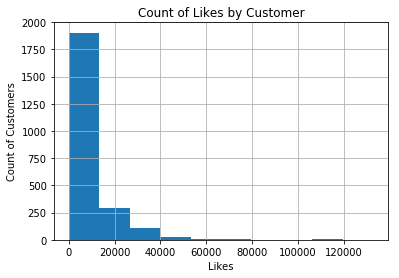

In [41]:
#Plot a histogram of retweets
plt.hist(tweet_data_clean['Likes'])
plt.xlabel('Likes')
plt.ylabel('Count of Customers')
plt.title('Count of Likes by Customer')
plt.grid(True)

> The data is skewed to the right so we would take our limit for retweets at 8,000 as shown in the histogram.

In [42]:
above_max = tweet_data_clean[tweet_data_clean['Likes'] > 14000]
abv_index = above_max['tweet_id'].index
tweet_data_clean = tweet_data_clean.drop(index=abv_index)

#### Test:

In [43]:
tweet_data_clean.describe()

,Likes,tweet_id
count,1933.000000,1.933000e+03
mean,3824.045008,7.252102e+17
std,3566.091507,5.733954e+16
min,0.000000,6.660209e+17
25%,1032.000000,6.753494e+17
50%,2790.000000,7.032685e+17
75%,5528.000000,7.671222e+17
max,13994.000000,8.909719e+17


### Issue #9:

#### Define: Merge image_pred and tweet_data as one table.

#### Code:

In [44]:
tweet_data_clean = pd.merge(image_pred_clean,tweet_data_clean, on=['tweet_id'], how='inner')

#### Test:

In [45]:
tweet_data_clean.head()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,p2,p3,Likes
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,True,0.156665,True,0.061428,True,Welsh_springer_spaniel,Collie,Shetland_sheepdog,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,Redbone,Miniature_pinscher,Rhodesian_ridgeback,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,German_shepherd,Malinois,Bloodhound,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,Rhodesian_ridgeback,Redbone,Miniature_pinscher,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,True,0.243682,True,0.154629,True,Miniature_pinscher,Rottweiler,Doberman,111


In [46]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 13 columns):
tweet_id    1679 non-null int64
jpg_url     1679 non-null object
img_num     1679 non-null int64
p1_conf     1679 non-null float64
p1_dog      1679 non-null bool
p2_conf     1679 non-null float64
p2_dog      1679 non-null bool
p3_conf     1679 non-null float64
p3_dog      1679 non-null bool
p1          1679 non-null object
p2          1679 non-null object
p3          1679 non-null object
Likes       1679 non-null int64
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 149.2+ KB


### Issue #10:

#### Define: Merge image_pred and tweet_data_clean tables.

#### Code:

In [47]:
tweet_archive_master = pd.merge(tweet_data_clean,Twit_archv_clean, on=['tweet_id'], how='inner')

#### Test:

In [48]:
tweet_archive_master.head(3)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,...,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,Redbone,...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,,
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,German_shepherd,...,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,,
2,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,Rhodesian_ridgeback,...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,,


In [49]:
tweet_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1137
Data columns (total 25 columns):
tweet_id              1138 non-null int64
jpg_url               1138 non-null object
img_num               1138 non-null int64
p1_conf               1138 non-null float64
p1_dog                1138 non-null bool
p2_conf               1138 non-null float64
p2_dog                1138 non-null bool
p3_conf               1138 non-null float64
p3_dog                1138 non-null bool
p1                    1138 non-null object
p2                    1138 non-null object
p3                    1138 non-null object
Likes                 1138 non-null int64
timestamp             1138 non-null datetime64[ns]
source                1138 non-null object
text                  1138 non-null object
expanded_urls         1138 non-null object
rating_numerator      1138 non-null int64
rating_denominator    1138 non-null int64
name                  1138 non-null object
doggo                 1138 non-nu

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
tweet_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [51]:
#read dataframe into jupyter notebook and name file as twitter_data
twitter_data = pd.read_csv('twitter_archive_master.csv')


In [52]:
twitter_data.head(3)

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,...,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,Redbone,...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,NaN
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,German_shepherd,...,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,NaN
2,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,Rhodesian_ridgeback,...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,NaN


In [53]:
# Find the mean for rating_numeration given that the denominator is constant at 10
average = twitter_data['rating_numerator'].mean().round()
print('The average rating score is {}/10'.format(int(average)))

The average rating score is 12/10


In [54]:
#Create a new column to extract th emonth from the timestamp feature
twitter_data['Month'] = pd.DatetimeIndex(twitter_data['timestamp']).month


In [55]:
tweets_mnth = twitter_data.groupby('Month')['Month','Likes'].sum()
tweets_mnth

,Month,Likes
Month,,
1,136,669406
2,202,553393
3,279,398472
4,184,227189
5,210,205912
6,342,352424
7,413,348545
8,368,327970
9,351,340136


In [56]:
# Defining coordinates
x = tweets_mnth.index
y = tweets_mnth['Likes']

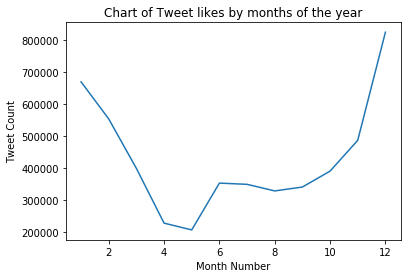

In [57]:
plt.plot(x,y);
plt.xlabel('Month Number')
plt.ylabel('Tweet Count')
plt.title('Chart of Tweet likes by months of the year')
plt.show()

In [58]:
#Find the Dog with the most likes
twitter_data[twitter_data['Likes'] == twitter_data['Likes'].max()]

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,p1,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,Month
1127,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,0.249012,True,0.166364,True,0.142254,True,Yorkshire_terrier,...,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,NaN,NaN,NaN,NaN,NaN,4


### Insights:
1.  A dog named Leo had the highest number of likes with a rating ration of 13/10. Leo is predicted to be a Yorkshire Terrier with confirmation status of 25% 

2. The month of April follewed by May witnessed a sharp drop in likes for the WeRateDogs campaign. The trend was reversed June  and eventually peaked in December.

3. The average rating ratio is 12/10

### Visualization

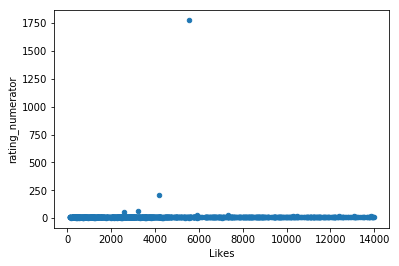

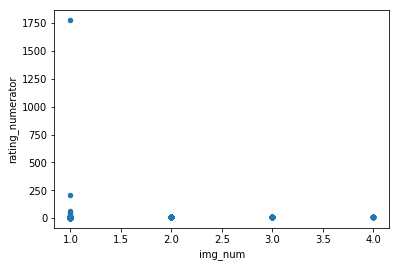

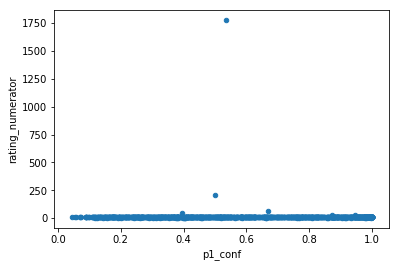

In [59]:
# investigate the correlation between tweet like,Retweets, img_num and p1_conf against rating numerator as the dependent variable.
cols = ['Likes','img_num','p1_conf']
def scat():
   for i in cols:
        twitter_data.plot.scatter(x=i,y='rating_numerator')
        
scat()      

In [60]:
#Adjusting for ouliers
twitter_data_clean = twitter_data[twitter_data['rating_numerator'] < 50]

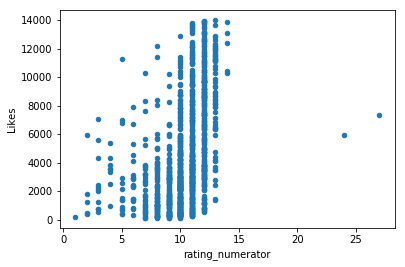

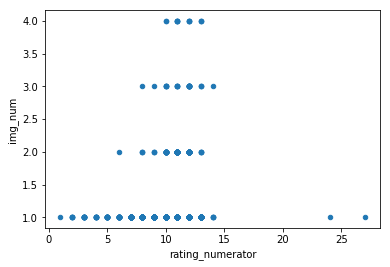

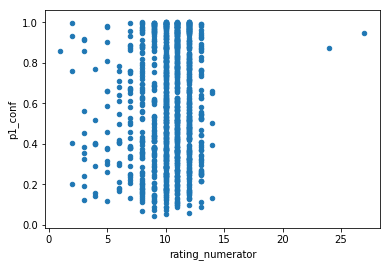

In [61]:
# investigate the correlation between tweet like and rating numerator.
cols = ['Likes','img_num','p1_conf']
def scat():
   for i in cols:
        twitter_data_clean.plot.scatter(y=i,x='rating_numerator')
        
scat()      

> The chart did not show any correlation when `rating_numerator` is plotted against `Likes`, `Img_num` or `p1_conf`